This notebook is meant to investigate the CMEMS historical drifters that will be used in the GIOPS-RIOPS-CIOPS-E analysis paper.

The goal is to identify any problematic drifters and decide how to handle them. For example
* Drifters with large time gaps
* Drifters with missing data or QC flags that indicate issues


In [2]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np 
import xarray as xr

In [3]:
data_dir='/home/soontiensn/data/gpsc-work2/OPP/drifter_data/model-compare-2016-drifters-ciopse-domain/'
data_actual='/home/soontiensn/data/gpsc-work2/OPP/drifter_data/model-compare-2016-drifters'
files = glob.glob(os.path.join(data_dir, '*.nc'))
# for some reason, sshfs doesn;t like symbolic links so use the unlinked files
newfiles=[]
for f in files:
    b=os.path.basename(f)
    newfiles.append(os.path.join(data_actual, b))

# Count drifters with time gaps > 24 hr

In [4]:
time_gaps=[]
for f in newfiles:
    d = xr.open_dataset(f)
    ds = d.sel(TIME=slice('2016-01-01', '2016-12-31'))
    time_diff=ds.TIME.diff(dim='TIME')
    time_diff_in_seconds = time_diff.values.astype('timedelta64[s]')
    if (time_diff_in_seconds.astype('float') >= 24*3600).any():
        time_gaps.append(f)

In [5]:
print("Number of drifters with gaps >= 24 hours: {}".format(len(time_gaps)))

Number of drifters with gaps >= 24 hours: 63


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/ana

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: 

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: 

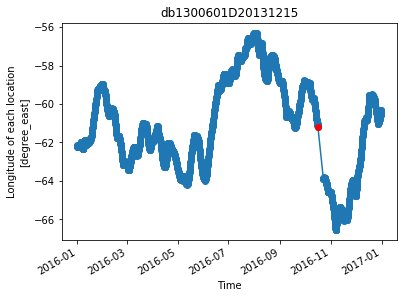

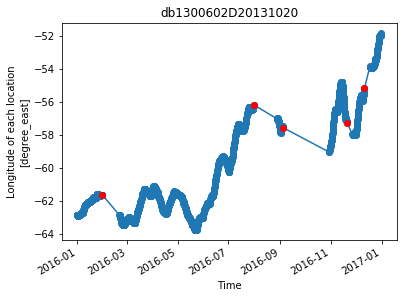

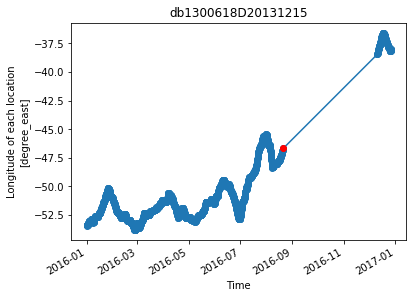

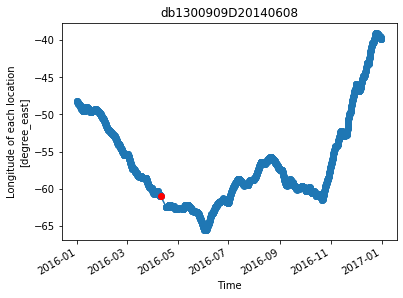

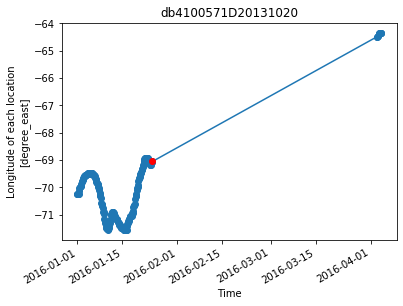

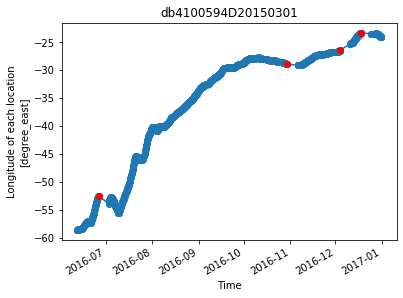

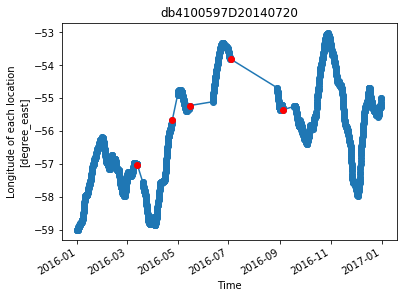

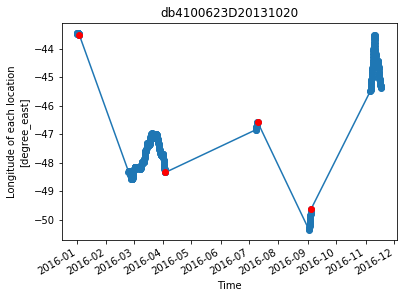

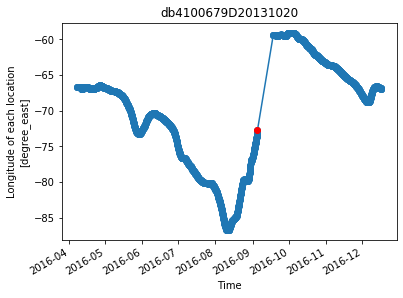

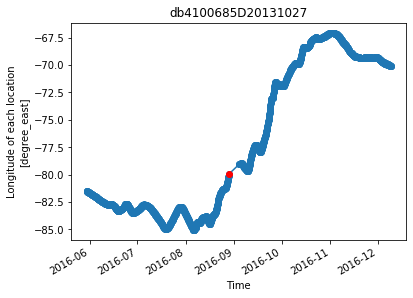

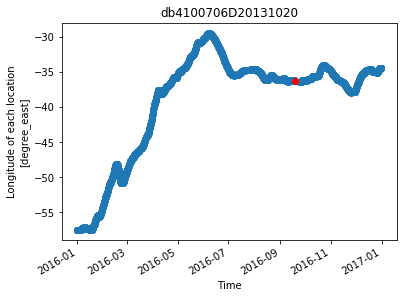

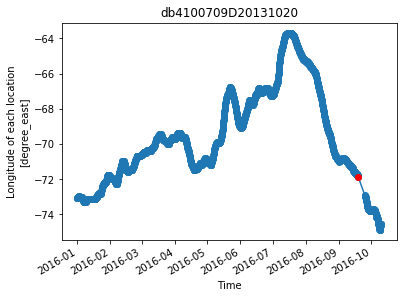

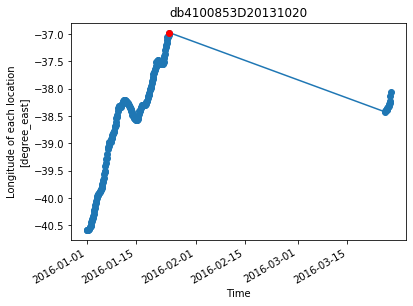

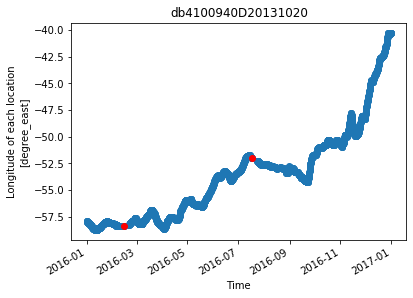

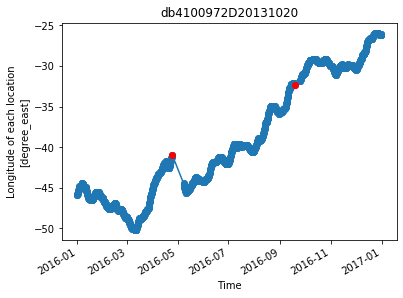

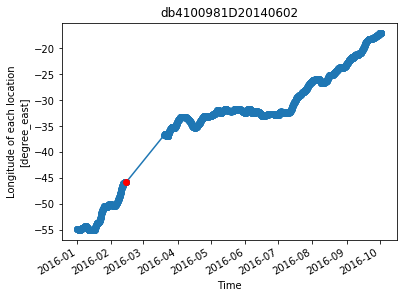

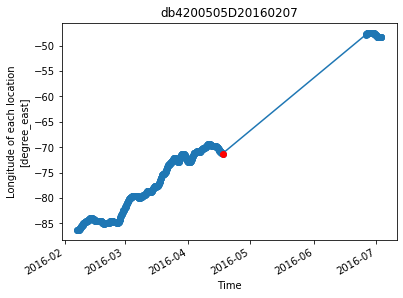

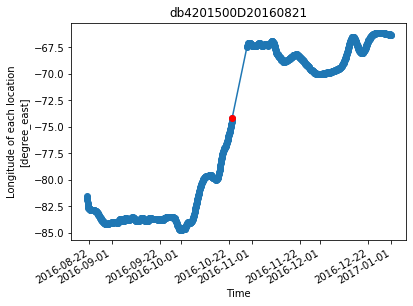

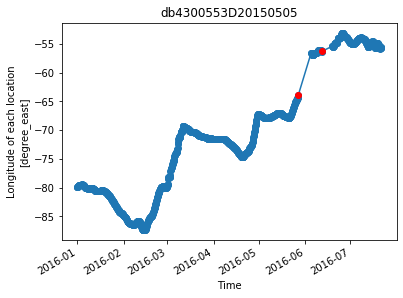

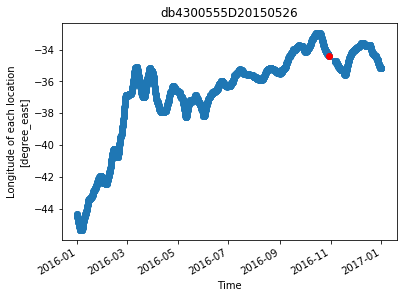

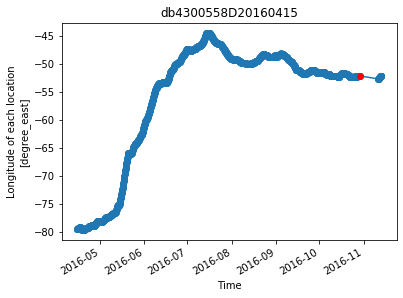

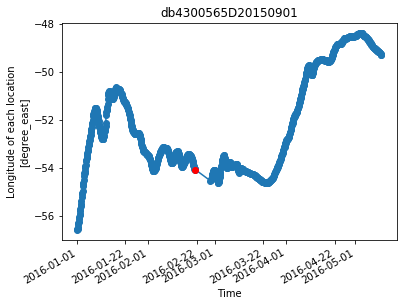

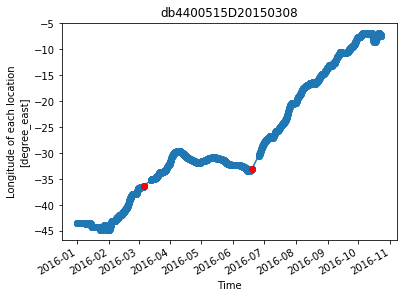

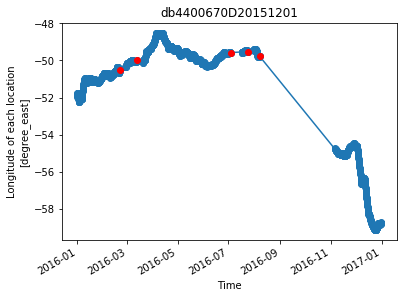

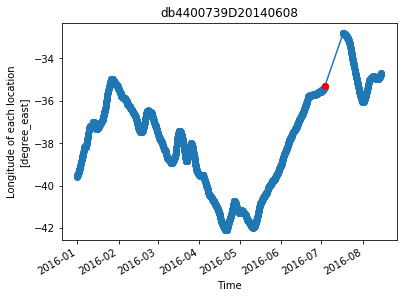

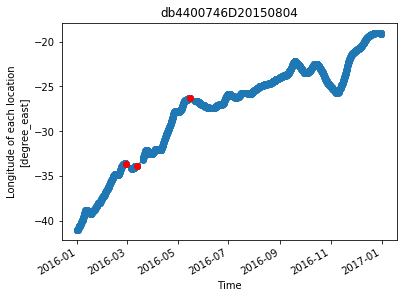

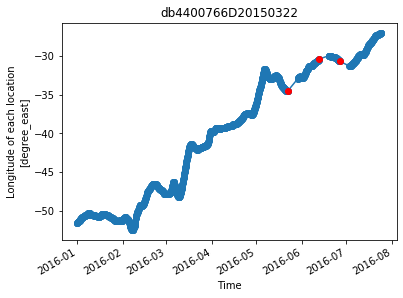

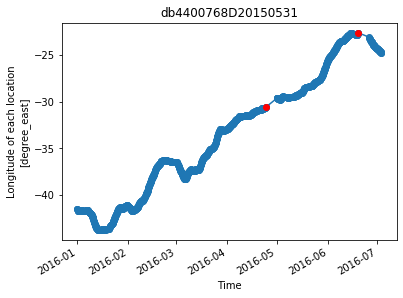

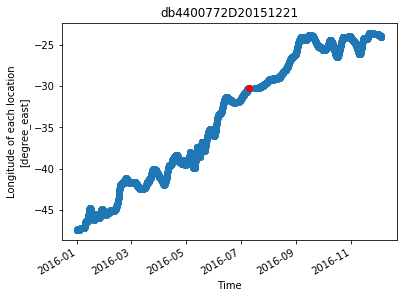

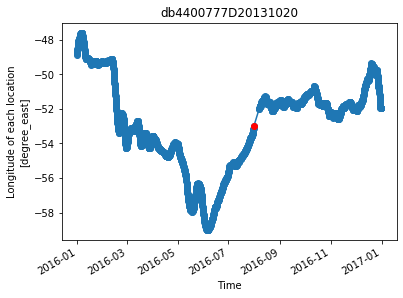

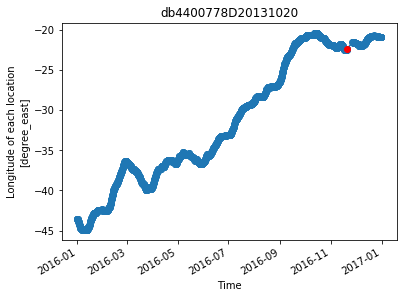

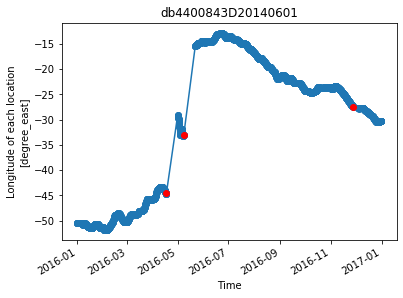

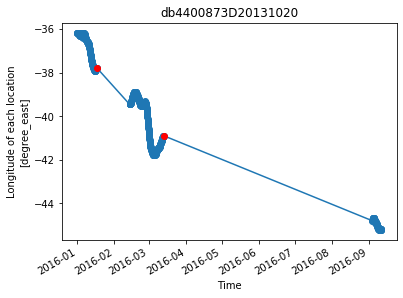

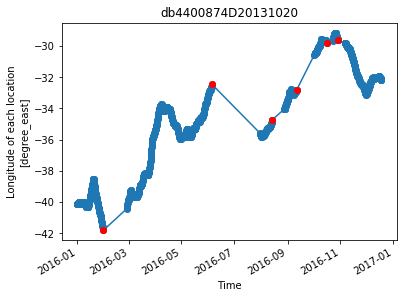

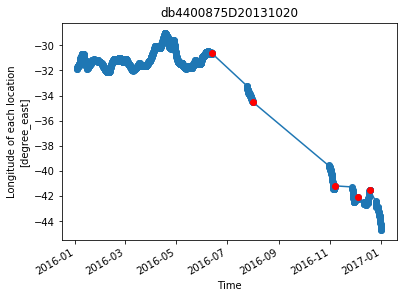

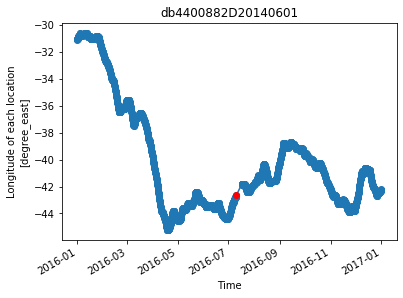

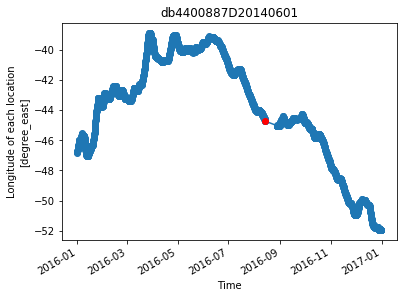

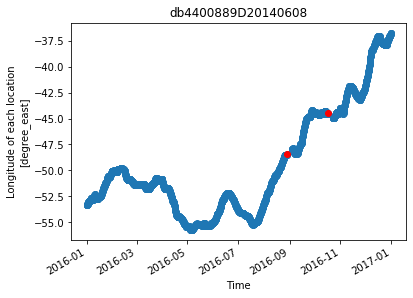

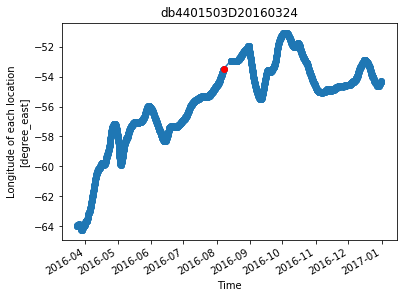

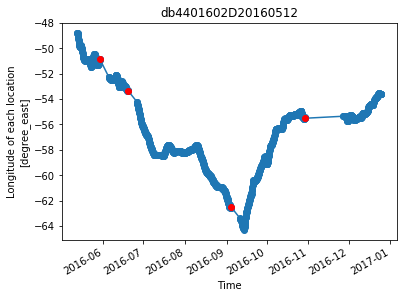

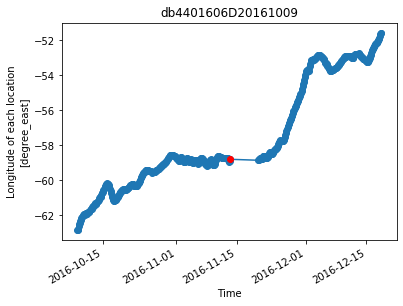

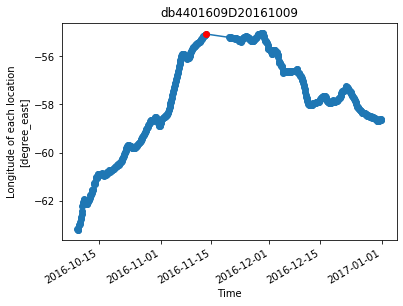

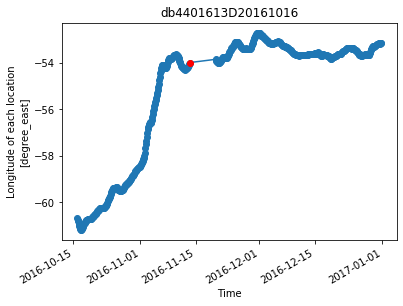

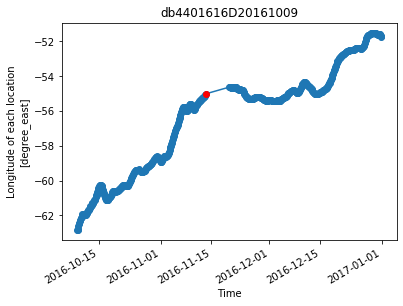

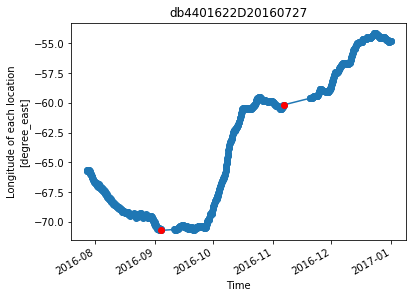

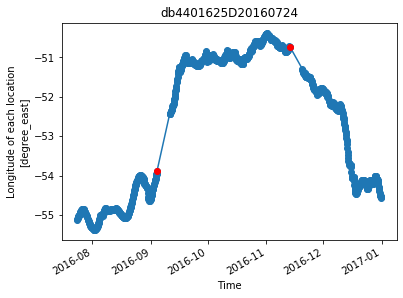

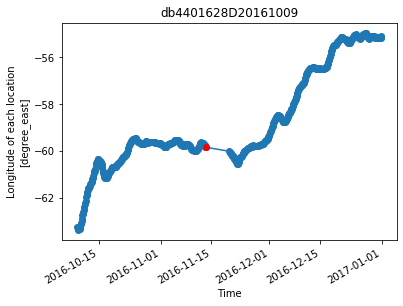

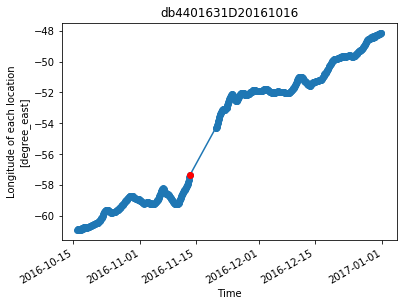

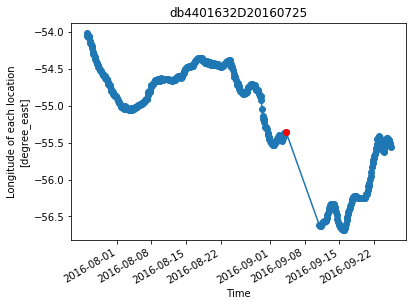

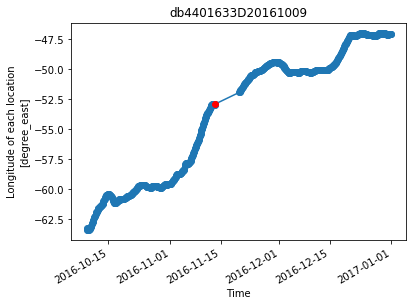

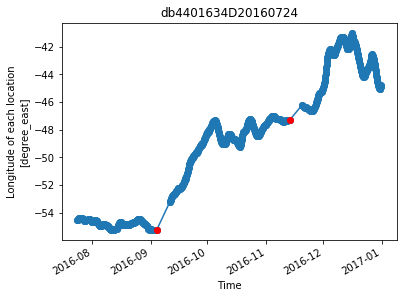

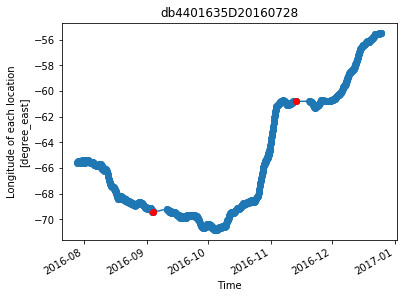

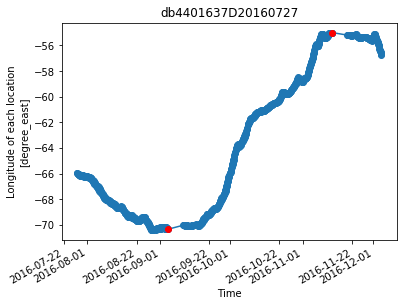

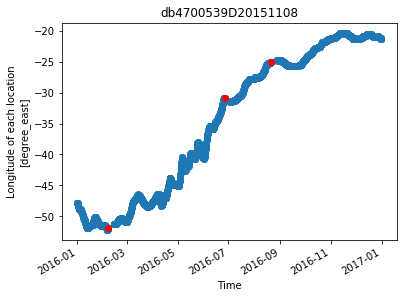

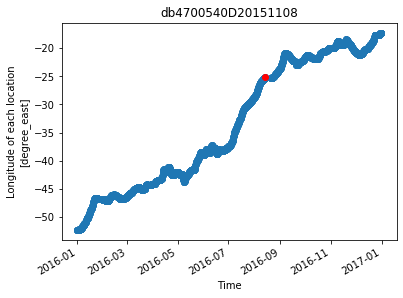

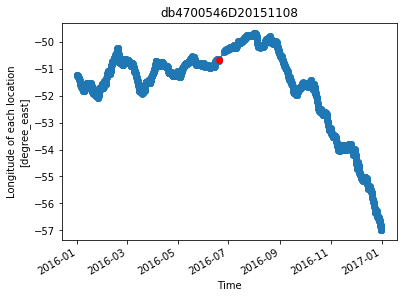

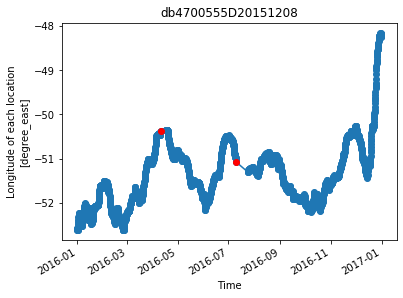

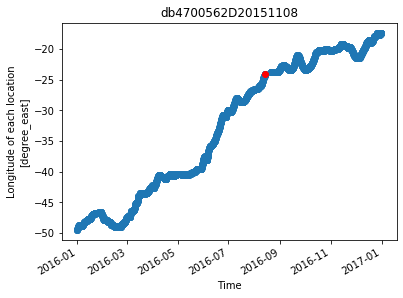

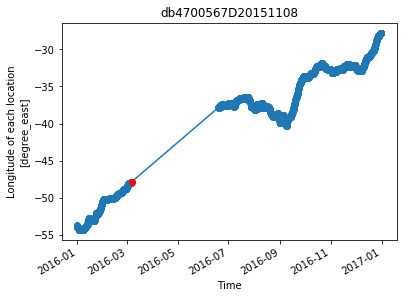

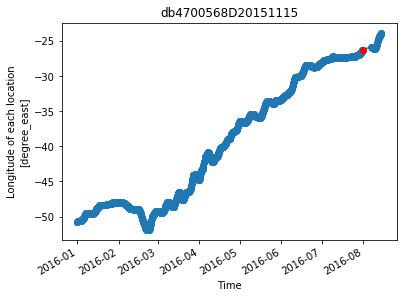

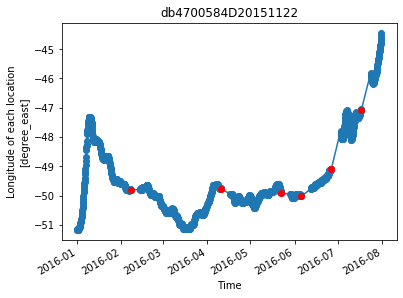

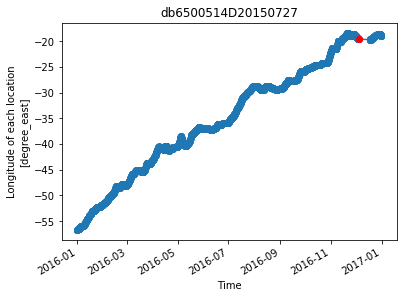

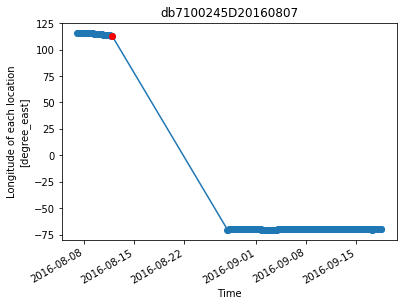

In [6]:
time_gaps.sort()
for f in time_gaps:
    fig,ax=plt.subplots(1,1)
    d = xr.open_dataset(f)
    ds = d.sel(TIME=slice('2016-01-01', '2016-12-31'))
    ds.LONGITUDE.plot(marker='o', ax=ax)
    ax.set_title(ds.buoyid)
    time_diff=ds.TIME.diff(dim='TIME')
    time_diff_in_seconds = time_diff.values.astype('timedelta64[s]')
    inds = np.where(time_diff_in_seconds.astype('float') >= 24*3600)
    ax.plot(ds.TIME.values[inds[0]],ds.LONGITUDE.values[inds[0]], 'ro')

In [7]:
for f in time_gaps:
    print(os.path.basename(f))

db1300601D20131215_historical.nc
db1300602D20131020_historical.nc
db1300618D20131215_historical.nc
db1300909D20140608_historical.nc
db4100571D20131020_historical.nc
db4100594D20150301_historical.nc
db4100597D20140720_historical.nc
db4100623D20131020_historical.nc
db4100679D20131020_historical.nc
db4100685D20131027_historical.nc
db4100706D20131020_historical.nc
db4100709D20131020_historical.nc
db4100853D20131020_historical.nc
db4100940D20131020_historical.nc
db4100972D20131020_historical.nc
db4100981D20140602_historical.nc
db4200505D20160207_historical.nc
db4201500D20160821_historical.nc
db4300553D20150505_historical.nc
db4300555D20150526_historical.nc
db4300558D20160415_historical.nc
db4300565D20150901_historical.nc
db4400515D20150308_historical.nc
db4400670D20151201_historical.nc
db4400739D20140608_historical.nc
db4400746D20150804_historical.nc
db4400766D20150322_historical.nc
db4400768D20150531_historical.nc
db4400772D20151221_historical.nc
db4400777D20131020_historical.nc
db4400778D

# Decision
* Divide files if time gap is greater than 1 day.
* `db7100245D20160807_historical.nc` should not be included in the runs.